- 説明変数Xのshapeは(データ数, 次元数)の形でなければならない。
- 目的変数yのshapeは(データ数, )の形でなければならない。

In [250]:
import physbo
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [251]:
seed=0

In [252]:
def func(x):
    return np.sin(x).reshape(-1)

In [253]:
# データセットの作成
x_range = (0,4)
x_len = 100 # xの個数
X = np.array([random.uniform(x_range[0],x_range[1]) for i in range(x_len)])
X=X.reshape(-1,1)
y = func(X)

Text(0.5, 1.0, 'True function and Data set points')

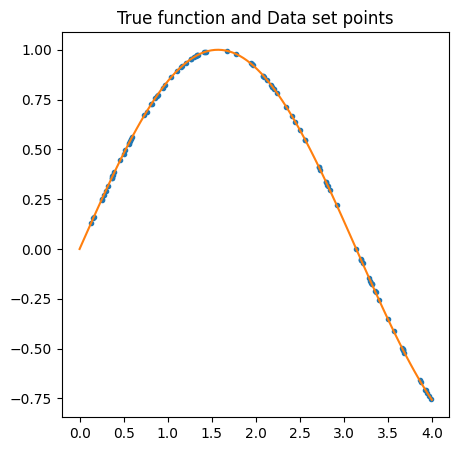

In [254]:
plt.figure(figsize=(5,5))

plt.plot(X, y, ".")
plt.plot(np.linspace(x_range[0],x_range[1],100),func(np.linspace(x_range[0],x_range[1],100)))

plt.title("True function and Data set points")

In [255]:
# ランダムサーチを行う。

random.seed(seed)
calculated_ids = random.sample(range(y.size), 3)
print(calculated_ids)
y_initial = y[calculated_ids]

[49, 97, 53]


In [256]:
# policyのセット
policy = physbo.search.discrete.policy(test_X=physbo.misc.centering(X), initial_data=[calculated_ids, y_initial])

# シード値のセット
policy.set_seed(0)

In [257]:
class simulator:
    def __call__(self, action):
        return y[action]

In [258]:
res = policy.bayes_search(max_num_probes=x_len//8, simulator=simulator(), score="TS", interval=1,  num_rand_basis = 5000)

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood -0.16855406458164657
50 -th epoch marginal likelihood -0.21739910202153045
100 -th epoch marginal likelihood -0.2200786667727137
150 -th epoch marginal likelihood -0.220083619420804
200 -th epoch marginal likelihood -0.22008592811324923
250 -th epoch marginal likelihood -0.220088184630574
300 -th epoch marginal likelihood -0.22009040773282496
350 -th epoch marginal likelihood -0.22009256089604445
400 -th epoch marginal likelihood -0.22009462302827743
450 -th epoch marginal likelihood -0.22009658324923165
500 -th epoch marginal likelihood -0.22009843727215417
Done

0004-th step: f(x) = 0.931269 (action=2)
   current best f(x) = 0.931269 (best action=2) 

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood -2.2729531383086843
50 -th epoch marginal likelihood -2.56011562461308
100 -th epoch mar

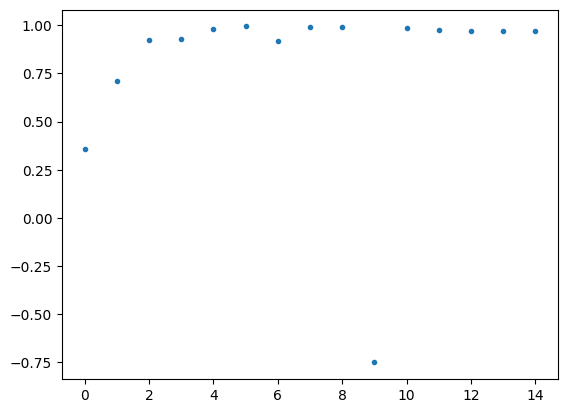

In [259]:
# 探索点
plt.plot(res.fx[0:res.total_num_search],".")

0.9942919926566555


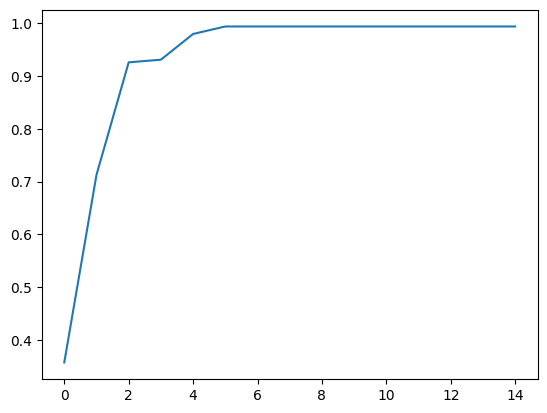

In [260]:
# 探索中の最大値
best_fx, best_action = res.export_all_sequence_best_fx()
plt.plot(best_fx)
print(best_fx[-1])